# `supplementary session on pandas`

In [1]:
import numpy as np
import pandas as pd

In [10]:
virat_kohli_scores = pd.read_csv('./content/kohli_ipl.csv', index_col = 0).squeeze(True)
virat_kohli_scores.index.name = None
virat_kohli_scores

1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [9]:
movies = pd.read_csv('./content/bollywood.csv', index_col=0).squeeze(True)
movies.index.name = None
movies

Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [12]:
subs = pd.read_csv('./content/subs.csv').squeeze(True)
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

### `astype()`
    
    This is used to change the data type of pandas series. This is used to reduce the size of the series.

In [13]:
import sys

In [14]:
sys.getsizeof(subs)

3084

    Right now the size is very much as we are using the int64 data type. But we can change this using astype()
    method.

In [16]:
subs = subs.astype(np.uint8)
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: uint8

In [17]:
sys.getsizeof(subs)

529

    See the humungous difference 😀

## `between`

    This is used to return a boolean series which can then be used to pass it as a mask to the original series.

In [21]:
mask = virat_kohli_scores.between(80, 100)
mask

1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool

In [22]:
virat_kohli_scores[mask]

81      93
82      99
110     82
119     80
120    100
145     92
160     84
164    100
178     90
Name: runs, dtype: int64

## `clip`

    clip is used to clip the values between a range. Suppose if we have clip(100, 200) then all values
    which are greater than 200 would be changed to 200 and all the values which are less than 100 would be changed
    to 100.

In [23]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: uint8

In [24]:
subs.clip(100, 200)

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: uint8

## `drop_duplicates()`

    The drop_duplicates() is used to drop the duplicate values.

In [25]:
temp = pd.Series([1, 1, 2, 2, 3, np.nan, np.nan, 5, 6])
temp

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    NaN
6    NaN
7    5.0
8    6.0
dtype: float64

In [26]:
temp.drop_duplicates(keep = 'last') # Keep the last occurence of each element

1    1.0
3    2.0
4    3.0
6    NaN
7    5.0
8    6.0
dtype: float64

In [32]:
temp.drop_duplicates(keep = 'first')

0    1.0
2    2.0
4    3.0
5    NaN
7    5.0
8    6.0
dtype: float64

In [33]:
temp.drop_duplicates(keep = False) # drops all duplicates

4    3.0
7    5.0
8    6.0
dtype: float64

## `dealing with missing values`

    The first one we have is isnull() and notnull() methods. These returns us a boolean mask with True where missing 
    value is present.

In [34]:
exp = pd.Series([1, 2, 3, 4, np.nan, 6, np.nan, 7, 8, np.nan, 9, np.nan, 10])
exp

0      1.0
1      2.0
2      3.0
3      4.0
4      NaN
5      6.0
6      NaN
7      7.0
8      8.0
9      NaN
10     9.0
11     NaN
12    10.0
dtype: float64

In [35]:
exp.isnull() # gives True wherever it finds the null values

0     False
1     False
2     False
3     False
4      True
5     False
6      True
7     False
8     False
9      True
10    False
11     True
12    False
dtype: bool

In [36]:
exp.isnull().sum() # gives the total number of missing values

4

In [37]:
exp.notnull()

0      True
1      True
2      True
3      True
4     False
5      True
6     False
7      True
8      True
9     False
10     True
11    False
12     True
dtype: bool

In [38]:
exp.notnull().sum() # gives the total number of non missing values

9

In [40]:
exp.count() # == exp.notnull().sum()

9

In [41]:
exp.size # gives the total size of the series

13

## `strategies to deal with missing values`

    We may decide to completely remove the missing values if the number of missing values is very small in 
    comparison to the size of the series. ORR We may decide to fill the missing values with some value if the
    number of missing value is comparable to the size of the series.
    
    Following this theory we have 2 methods.
    1. dropna() - Used to drop the missing values
    2. fillna() - Used to fill the missing values

In [42]:
exp

0      1.0
1      2.0
2      3.0
3      4.0
4      NaN
5      6.0
6      NaN
7      7.0
8      8.0
9      NaN
10     9.0
11     NaN
12    10.0
dtype: float64

In [43]:
exp.dropna() # drops all the missing values and returns us a new series

0      1.0
1      2.0
2      3.0
3      4.0
5      6.0
7      7.0
8      8.0
10     9.0
12    10.0
dtype: float64

In [44]:
exp # The series is not changed as the above operation was non mutational operation.

0      1.0
1      2.0
2      3.0
3      4.0
4      NaN
5      6.0
6      NaN
7      7.0
8      8.0
9      NaN
10     9.0
11     NaN
12    10.0
dtype: float64

In [45]:
exp.dropna(inplace=True) # modifes the series itself

In [46]:
exp

0      1.0
1      2.0
2      3.0
3      4.0
5      6.0
7      7.0
8      8.0
10     9.0
12    10.0
dtype: float64

#### `Side Note`

    In the above series, since now we have removed the missing values we can change the data type of the resultant
    series.

In [48]:
sys.getsizeof(exp)

176

In [50]:
exp = exp.astype(np.uint8)
print(sys.getsizeof(exp))
exp

113


0      1
1      2
2      3
3      4
5      6
7      7
8      8
10     9
12    10
dtype: uint8

### `filling missing values`

In [52]:
exp = pd.Series([1, 2, 3, 4, np.nan, 6, np.nan, 7, 8, np.nan, 9, np.nan, 10])
exp

0      1.0
1      2.0
2      3.0
3      4.0
4      NaN
5      6.0
6      NaN
7      7.0
8      8.0
9      NaN
10     9.0
11     NaN
12    10.0
dtype: float64

In [56]:
exp = exp.fillna(value = 0) # exp.fillna(0, inplace=True)
exp

0      1.0
1      2.0
2      3.0
3      4.0
4      0.0
5      6.0
6      0.0
7      7.0
8      8.0
9      0.0
10     9.0
11     0.0
12    10.0
dtype: float64

#### `Let us create a very large series and fill every 3rd value with missing value. and let's clean it.` 

In [62]:
very_large_series = pd.Series({
    i+2 : (i if i % 3 != 0 else np.nan)  for i in range(100_00)
})

very_large_series

2           NaN
3           1.0
4           2.0
5           NaN
6           4.0
          ...  
9997     9995.0
9998        NaN
9999     9997.0
10000    9998.0
10001       NaN
Length: 10000, dtype: float64

In [63]:
sys.getsizeof(very_large_series)

160032

In [64]:
very_large_series = very_large_series.dropna()
very_large_series

3           1.0
4           2.0
6           4.0
7           5.0
9           7.0
          ...  
9994     9992.0
9996     9994.0
9997     9995.0
9999     9997.0
10000    9998.0
Length: 6666, dtype: float64

In [65]:
sys.getsizeof(very_large_series)

106688

    We can further reduce the size of the very_large_series by changing its data type to np.uint16

In [66]:
very_large_series = very_large_series.astype(np.uint32)
very_large_series

3           1
4           2
6           4
7           5
9           7
         ... 
9994     9992
9996     9994
9997     9995
9999     9997
10000    9998
Length: 6666, dtype: uint32

In [68]:
sys.getsizeof(very_large_series)

80024

# `isin()`
    
    The isin() method is used to return us a boolean series. This series can then be used to filter out the original
    series.

In [69]:
mask = movies.isin(['Akshay Kumar', 'Shah Rukh Khan', 'Salman Khan'])
mask

Uri: The Surgical Strike                False
Battalion 609                           False
The Accidental Prime Minister (film)    False
Why Cheat India                         False
Evening Shadows                         False
                                        ...  
Hum Tumhare Hain Sanam                   True
Aankhen (2002 film)                     False
Saathiya (film)                         False
Company (film)                          False
Awara Paagal Deewana                     True
Name: lead, Length: 1500, dtype: bool

In [70]:
movies[mask]

Kesari (film)                 Akshay Kumar
Mission Mangal                Akshay Kumar
Housefull 4                   Akshay Kumar
Dabangg 3                      Salman Khan
Good Newwz                    Akshay Kumar
                                 ...      
Andaaz                        Akshay Kumar
Tere Naam                      Salman Khan
Devdas (2002 Hindi film)    Shah Rukh Khan
Hum Tumhare Hain Sanam      Shah Rukh Khan
Awara Paagal Deewana          Akshay Kumar
Name: lead, Length: 101, dtype: object

<Axes: ylabel='count'>

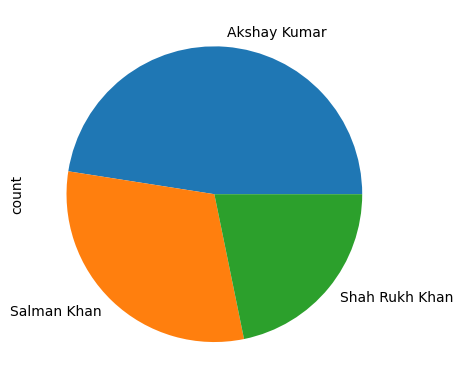

In [71]:
movies[mask].value_counts().plot(kind = 'pie')

## `apply()` method

    The apply() method is used to apply a function to each and every value of a series. This applies the function in
    a vectorized manner.

In [72]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: uint8

### `lets call all the days when the number of subscribers gained was more than the mean as 'good' and rest 'bad'.`

In [74]:
mean_subs = subs.mean()
performance_matrics = subs.apply(lambda x : 'good' if x > mean_subs else 'bad')
performance_matrics

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
360    good
361    good
362    good
363    good
364    good
Name: Subscribers gained, Length: 365, dtype: object

<Axes: ylabel='count'>

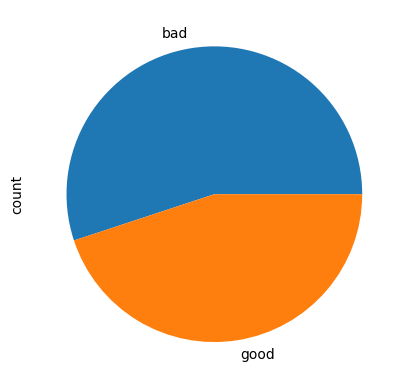

In [79]:
performance_matrics.value_counts().plot(kind = 'pie')